## **Inspect Model**

### **Imports**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys

ROOT_DIR = os.path.abspath("../")
print('Root directory:',ROOT_DIR)

sys.path.append(ROOT_DIR)
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline 

LOGS_DIR = os.path.join(ROOT_DIR, "logs", "inspect")

if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    print(f"Folder '{LOGS_DIR}' created.")

Root directory: c:\Users\abell\Documents\aa_delft\J4\BEP\ai


In [2]:
%load_ext autoreload
%autoreload 2
import bep.utils as utils

### **Configurations**

In [3]:
import tdmms.tdmcoco as tdmcoco
config = tdmcoco.CocoConfig()

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 3  # thin, few, thick
    DETECTION_MIN_CONFIDENCE = 0.7
    USE_MINI_MASK = False
config = InferenceConfig()
# config.display()

### **Load data**

In [5]:
utils.create_dir_setup(ROOT_DIR, (0.8, 0.1, 0.1))

Creating directories from batches..
Found batches: batch1, batch2, batch3, batch4
Total image count: 36
Copying images..
Checking image counts..
Creating and writing annotation files..


In [4]:
utils.check_dir_setup(ROOT_DIR, (0.8, 0.1, 0.1))

_, bep_val, _ = utils.load_train_val_datasets(ROOT_DIR)

# from bep_data_class import bepDataset
# bep_val = bepDataset()
# bep_val.load_dir(os.path.join(ROOT_DIR, 'data'), 'val', reload_annotations=True)
# bep_val.prepare()

print("BEP NbSe2 images: {} | Classes: {}".format(len(bep_val.image_ids),bep_val.class_names))

Directory setup correctly
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
BEP NbSe2 images: 3 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']


### **Load Model**

In [5]:
BEP_MODEL_PATH = os.path.join(ROOT_DIR, 'saved_weights', 'tdm20241016T2359', 'mask_rcnn_tdm_0111.h5')
model_NbSe2 = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR, config=config, name='NbSe2 Fine-tuned Model')
print("NbSe2 Model, loading weights {}".format(BEP_MODEL_PATH))
model_NbSe2.load_weights(BEP_MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead
NbSe2 Model, loading weights c:\Users\abell\Documents\aa_delft\J4\BEP\ai\saved_weights\tdm20241016T2359\mask_rcnn_tdm_0111.h5
Re-starting from epoch 111


### **Run Model**

In [6]:
run_model = utils.runModel(model_NbSe2, config)

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  245.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  121.30000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Instance: 0, Label: Thick
Polygon (xy): [[704.  706.5]
 [703.  706.5]
 [702.  706.5]
 [701.5 706. ]
 [701.  705.5]
 [700.  705.5]
 [699.  705.5]
 [698.  705.5]
 [697.  705.5]
 [696.5 705. ]
 [697.  704.5]
 [698.  704.5]
 [698.5 704. ]
 [699.  703.5]
 [699.5 703. ]
 [699.5 702. ]
 [699.5 701. ]
 [700.  700.5]
 [700.5 700. ]
 [700.5 699. ]
 [700.5 698. ]
 [700.5 697. ]
 [701.  696.5]
 [701.5 696. ]
 [702.  695.5]
 [703.  695.5]
 [704.  695.5]
 [704.5 695. ]
 [705.  694.5]
 [705.5 694. ]
 [706.  693.5]
 [706.5 693. ]
 [706.5 692. ]
 [706.  691.5]
 [705.5 691. ]
 [705.  690.5]
 [704.5 690. ]
 [704

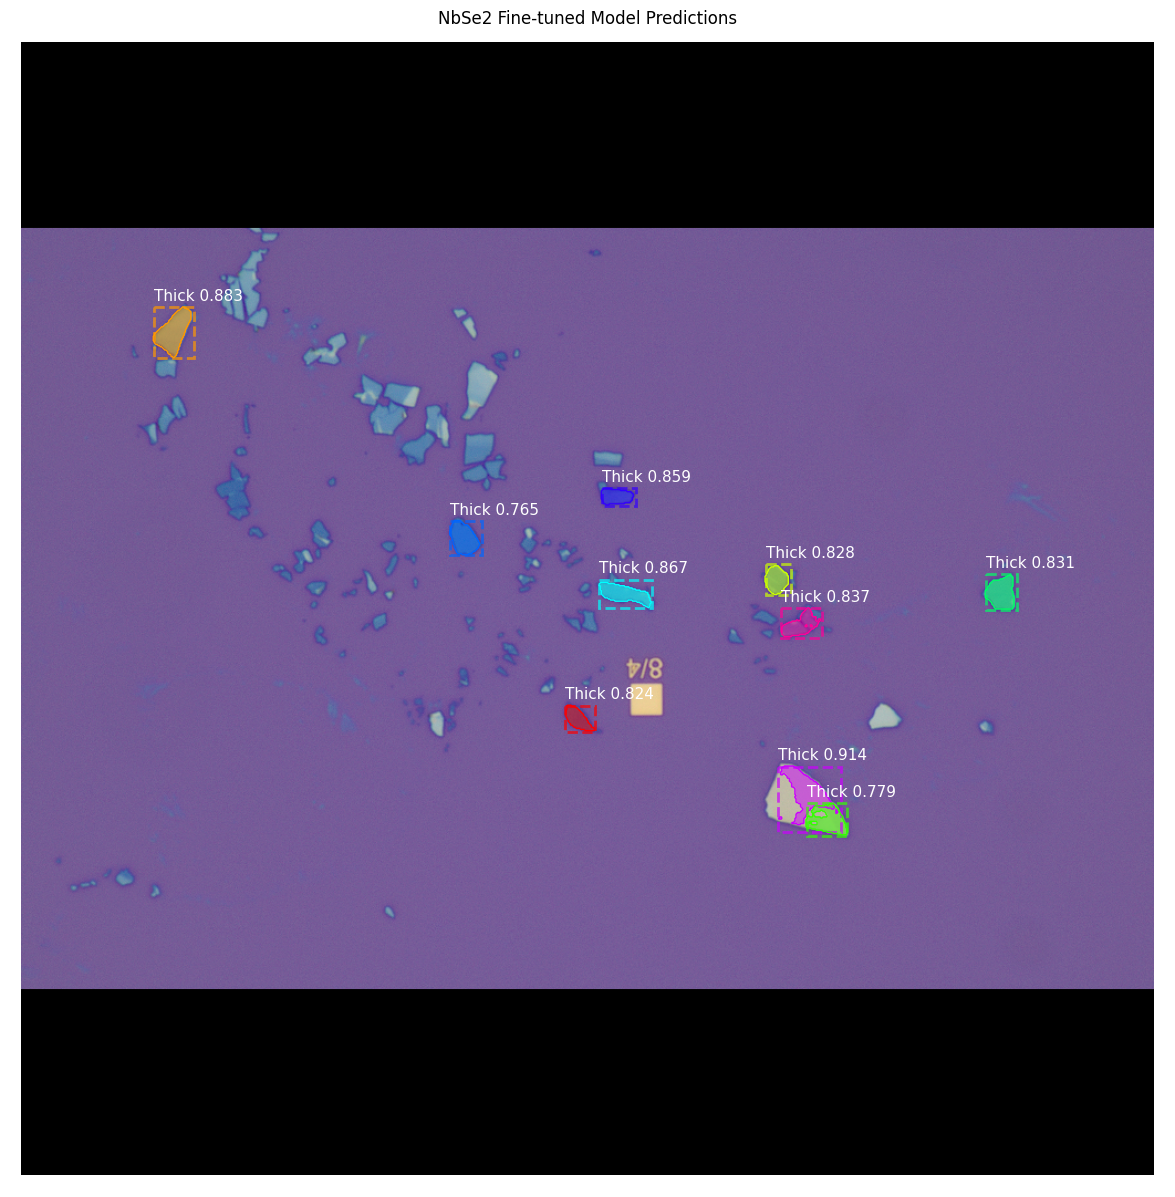

In [7]:
# run_model.run(image_idx=3, dataset=bep_val)
# run_model.gt()

run_model.run_from_path(os.path.join(ROOT_DIR, 'data', 'images', 'batch4', '67_sio2_NbSe2_Exfoliation_C5-84_f4_img.png'))